In [88]:
import time
import pandas as pd
#====== selenium activate esc key ======
from selenium.webdriver import ActionChains # activate esc key
from selenium.webdriver.common.keys import Keys # activate esc key

#====== selenium cathc NoSuchElementException ======
from selenium.common.exceptions import NoSuchElementException   
def check_exists_by_xpath(xpath):
    try:
        driver.find_element_by_xpath(xpath)
    except NoSuchElementException:
        return False
    return True

def get_selenium_param(filename):
    paramList = []
    with open(filename, "r") as f:
        for line in f:
            single_store_param = line.split(',')
            single_store_param[2] = single_store_param[2].replace('\n','')
            paramList.append(single_store_param)

    return paramList

In [4]:
def output_csv(filename, data_list, write_method):

    import csv

    # 開啟輸出的 CSV 檔案
    with open(filename, write_method, newline='') as csvfile:
        writer  = csv.writer(csvfile)   # 建立 CSV 檔寫入器
        for row in data_list: # format: two dimension
            writer.writerow(row)

# Scrape url

In [6]:
#====== step1: get selenium parameter ======
store_selenium_param = get_selenium_param('selenium_url')
store_names = []
store_page_xpath = []
first_page_xpath = []

for line in store_selenium_param:
    store_names.append(line[0])
    store_page_xpath.append(line[1])
    first_page_xpath.append(line[2])

    
print(first_page_xpath)

['href="/p/B_mKQXtnGX0/"']


In [7]:
#===== step2: scrape url from first post ======
startTime = time.time()

#====== use selenium to crawl store url ======
from selenium import webdriver

ig_home = "https://instagram.com"
driver = webdriver.Chrome(executable_path="chrome_driver/chromedriver") # Use Chrome
driver.get(ig_home) # open ig home page
time.sleep(2)

# login
driver.find_element_by_xpath('//input[@name="username"]').send_keys('bestronger10142008')
driver.find_element_by_xpath('//input[@name="password"]').send_keys('igcoke1231')
time.sleep(2)
driver.find_element_by_xpath('//button[@type="submit"]').click()
time.sleep(5)

# iterate to get each store url
for store_index in range(len(store_names)):
    # input store name
    driver.find_element_by_xpath('//input[@type="text"]').send_keys(store_names[store_index])# input store name
    time.sleep(5)
    
    # check if store name exist
    if check_exists_by_xpath('//a[@' + store_page_xpath[store_index] + ']'): # check if store name exist
        driver.find_element_by_xpath('//a[@' + store_page_xpath[store_index] + ']').click() # click store page
        time.sleep(5)
    else:
        print(str(store_names[store_index])+' not exist......')
        driver.find_element_by_xpath('//input[@type="text"]').clear()
        continue
    
    
    # check if first page link exist
    if check_exists_by_xpath('//a[@' + first_page_xpath[store_index] + ']'):
        driver.find_element_by_xpath('//a[@' + first_page_xpath[store_index] + ']').click() # click first page link
        time.sleep(3)
    else:
        print(str(store_names[store_index]) + 'first page link not exist......')
        continue
        

    # get url of current page
    url_list, post_date = [], []
    url_list.append([driver.current_url]) # get first page url
    time.sleep(1)
    
    # check if time of first page link exist, wait until get...
    for _ in range(10):
        if check_exists_by_xpath('//time[@class="_1o9PC Nzb55"]'):
            post_date.append([driver.find_element_by_xpath('//time[@class="_1o9PC Nzb55"]').text])
            time.sleep(3)
            break
        else:
            print(str(store_names[store_index]) + ' time not exist......' )
    

    # get 500 page url
    for i in range(6000):
        # check if reach end post, yes then break and transfer to next store
        if check_exists_by_xpath('//a[@tabindex="0"][2]'):
            driver.find_element_by_xpath('//a[@tabindex="0"][2]').click()
        else:
            break

        time.sleep(1)
        url_list.append([driver.current_url])
        time.sleep(5)
        
        # check if time exist, wait until get...
        for _ in range(20):
            if check_exists_by_xpath('//time[@class="_1o9PC Nzb55"]'):
                post_date.append([driver.find_element_by_xpath('//time[@class="_1o9PC Nzb55"]').text])
                stopDate = post_date[-1][0]
                break
            else:
                print(str(store_names[store_index]) + ' time not exist......' )
                time.sleep(3)

        
        # stop date = 2019.6.1
        if stopDate[:stopDate.find('年')] == '2018' and stopDate[stopDate.find('年')+1:stopDate.find('月')] == '6':
            break
            
    ActionChains(driver).send_keys(Keys.ESCAPE).perform() # close floating page
    output_csv('dataset/url_' + store_names[store_index], url_list, 'w+')
    output_csv('dataset/date_' + store_names[store_index], post_date, 'w+')
    print(store_names[store_index]+'finished!')
    
driver.close()
stopTime = time.time()
print((stopTime-startTime)/60)

山下公園 ラーメンfinished!
118.19367051521937


# Scrape google map comment

In [97]:
# assigned_url = 'https://www.google.com/maps/place/Nobu+Palo+Alto/@37.4437223,-122.1637038,17z/data=!3m1!4b1!4m11!1m3!2m2!1srestaurants!6e5!3m6!1s0x0:0x5bb11772add3928!8m2!3d37.4437179!4d-122.1615154!9m1!1b1'
# assigned_url = 'https://www.google.com/maps/place/%E6%B1%A0%E5%85%88%E7%94%9F+Kopitiam+(%E5%85%AC%E9%A4%A8%E5%BA%97)/@25.015967,121.5296153,17z/data=!3m1!4b1!4m7!3m6!1s0x0:0xcb151d59c948dbd9!8m2!3d25.015967!4d121.531804!9m1!1b1'
# assigned_url = 'https://www.google.com/maps/place/MacArthur+Park/@37.4430255,-122.1676983,17z/data=!3m1!4b1!4m11!1m3!2m2!1srestaurants!6e5!3m6!1s0x0:0x2b134ee0988b3bde!8m2!3d37.4430258!4d-122.1655098!9m1!1b1'
assigned_url = 'https://www.google.com/maps/place/Living+One/@25.0176847,121.5421344,17z/data=!3m1!4b1!4m7!3m6!1s0x3442aa255f7b84b5:0x295aa628180e4524!8m2!3d25.0176847!4d121.5443231!9m1!1b1'

In [103]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import time
# from selenium.webdriver.common.keys import Keys
import io
# from selenium.webdriver.common.action_chains import ActionChains

#====== get webpage html ======

driver = webdriver.Chrome(executable_path="chrome_driver/chromedriver") # Use Chrome
driver.get(assigned_url) # open ig home page


stop_cnt = 0 # count to stop scroll down loop

# len always get 0, so use stop_cnt to stop loop
reviewCount = len(driver.find_elements_by_xpath("//div[@class='section-review ripple-container']"))
time.sleep(10)
# loading a minimum of 50 reviews
while reviewCount <50: #<=== change this number based on your requirement
    # load the reviews
    driver.find_element_by_xpath("//div[contains(@class,'section-loading-spinner')]").location_once_scrolled_into_view 
    # wait for loading the reviews
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='section-loading-overlay-spinner'][@style='display:none']")))
    # get the reviewsCount
    reviewCount = len(driver.find_elements_by_xpath("//div[@class='section-review ripple-container']"))
    stop_cnt += 1
    print(stop_cnt)
    if stop_cnt == 100: # 1000: get 158 comments
        break
    

actions = ActionChains(driver)

time.sleep(3)
# content = driver.find_element_by_class_name('scrollable-show').click()
htmlstring = driver.page_source
afterstring=""
for _ in range(10000):
    afterstring = htmlstring
    actions.send_keys(Keys.PAGE_DOWN).perform()
    htmlstring = driver.page_source
    if afterstring == htmlstring:
        print ("ended scraping crack test one")
        actions.send_keys(Keys.PAGE_DOWN).perform()
        htmlstring = driver.page_source
        if afterstring == htmlstring:
            print("--Scrapping End--")
            break
    time.sleep(3)

#====== parse html ======
print('start parsing...')
soup = BeautifulSoup(htmlstring,"lxml")
mydivs = soup.findAll("div", {"class": "section-review-content"})

print ("Total reviews scraped:"+str(len(mydivs)))


driver.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
ended scraping crack test one
--Scrapping End--
start parsing...
Total reviews scraped:118


'<html itemscope="" itemtype="http://schema.org/Place" lang="zh-TW" jstcache="0" style="font-family: Roboto, &quot;Noto Sans TC&quot;, Arial, sans-serif;"><head> <link href="/maps/preview/opensearch.xml?hl=zh-TW" title="Google 地圖" rel="search" type="application/opensearchdescription+xml"> <title>Living One - Google 地圖</title> <meta content="利用「Google 地圖」尋找本地商家、檢視地圖或規劃行車路線。" name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Living One" itemprop="name"> <meta content="Living One" property="og:title"> <meta content="https://lh5.googleusercontent.com/p/AF1QipPS0VDFLdsIULxziXnVQ-6UwpiXQLv9p7Z0Tps9=w256-h256-k-no-p" itemprop="image"> <meta content="https://lh5.googleusercontent.com/p/AF1QipPS0VDFLdsIULxziXnVQ-6UwpiXQLv9p7Z0Tps9=w256-h256-k-no-p" property="og:imag
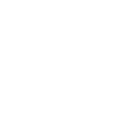
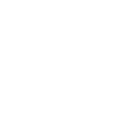

In [105]:
 htmlstring

In [106]:
#====== write into csv ======

counter = 0
google_data = []
for a in mydivs: 
    print(counter)
    name = str(a.find("div", class_="section-review-title").text)
    reviewer_detail = str(a.find("div", class_="section-review-subtitle").text)
    review_stars = str(a.find("span", class_="section-review-stars").get('aria-label'))
    review_text = str(a.find("span", class_="section-review-text").text)
    review_date = a.find("span", class_="section-review-publish-date").text
    google_data.append((name, reviewer_detail, review_stars, review_text, review_date))
    
#     textdoc.write(str("\nReviewer name: "+a.find("div", class_="section-review-title").text)+" \n||Reviewer Detail: " + str(a.find("div", class_="section-review-subtitle").text) +" \n||Reviewerer Profile URL:"+ str(a.find("a").get('href')))
#     textdoc.write(str("\n"+a.find("span", class_="section-review-stars").get('aria-label')))
#     textdoc.write(" \n||" + a.find("span", class_="section-review-text").text+" \n|| " + a.find("span", class_="section-review-publish-date").text)
#     textdoc.write("=========================================\n")
    counter = counter + 1
print ("Total reviews scraped:"+str(counter))
# textdoc.close()
print(google_data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
Total reviews scraped:118
[(' 卡縫 ', ' 在地嚮導 ・268 則評論 ', ' 5 顆星 ', '兩年前在這裡辦婚禮，美食沒能好好品嚐，今天帶老婆回來細細咀嚼，真的是很棒的一家餐廳，環境和氣氛很到位，適合情侶和家族聚餐👍\n感覺的出來食材特別、新鮮、健康，超級滿足👍👍\n對於麵包特別挑剔的我迷上它的麵包，我怕以後吃不到怎麼辦阿😆😆', '2 個月前'), (' Hwa Hong ', ' 在地嚮導 ・43 則評論 ', ' 5 顆星 ', '台大校園內高級西餐廳，環境安靜優雅，座位寬敞 ;  義大利菜健康取向，餐點取材用心，值得推薦!', '2 個月前'), (' Fang Mark ', ' 在地嚮導 ・204 則評論 ', ' 5 顆星 ', '餐點令人驚艷! 用餐環境舒適愜意，適合聚會或是家庭用餐，值得推薦。', '11 個月前'), (' Andy Liu ', ' 在地嚮導 ・533 則評論 ', ' 4 顆星 ', '煙燻鴨腿:560， 肋眼心:980', '1 週前'), (' HiSmart ', ' 在地嚮導 ・160 則評論 ', ' 5 顆星 ', '隱藏在台大校園裡的義式餐廳\n空間寬敞舒適 餐點好吃有創意\n服務人員親切又專業', '10 個月前'), (' Flora Lin ', ' 在地嚮導 ・16 則評論 ', ' 5 顆星 ', '素菜也做得精緻好吃\n服務週到\n用餐環境安靜且氣氛良好

In [110]:
#====== create google review dataframe ======
google_review_df = pd.DataFrame(google_data,columns=['name','detail','star','text','date'])
google_review_df[google_review_df['star'] == ' 5 顆星 ']

,name,detail,star,text,date
0,卡縫,在地嚮導 ・268 則評論,5 顆星,兩年前在這裡辦婚禮，美食沒能好好品嚐，今天帶老婆回來細細咀嚼，真的是很棒的一家餐廳，環境和氣...,2 個月前
1,Hwa Hong,在地嚮導 ・43 則評論,5 顆星,台大校園內高級西餐廳，環境安靜優雅，座位寬敞 ; 義大利菜健康取向，餐點取材用心，值得推薦!,2 個月前
2,Fang Mark,在地嚮導 ・204 則評論,5 顆星,餐點令人驚艷! 用餐環境舒適愜意，適合聚會或是家庭用餐，值得推薦。,11 個月前
4,HiSmart,在地嚮導 ・160 則評論,5 顆星,隱藏在台大校園裡的義式餐廳\n空間寬敞舒適 餐點好吃有創意\n服務人員親切又專業,10 個月前
5,Flora Lin,在地嚮導 ・16 則評論,5 顆星,素菜也做得精緻好吃\n服務週到\n用餐環境安靜且氣氛良好,6 個月前
7,Paruru T.,在地嚮導 ・18 則評論,5 顆星,很用心的訂製式Buffet！食材、味道、價錢，一流！,3 個月前
8,Sunny Lou,在地嚮導 ・111 則評論,5 顆星,所有的東西都很有品質！\n這次我點了松阪豬，令人驚喜的是他的松阪豬不像市面上常見的薄片料理方...,1 年前
15,金子,在地嚮導 ・47 則評論,5 顆星,氣氛好，採光佳，音響也不錯，整體很舒服。\n前菜、湯、麵包都很滿意。\n主菜也很好吃😋,8 個月前
19,Nancy,在地嚮導 ・106 則評論,5 顆星,We had 爐烤鮭魚酸豆紫蘇奶油燉飯 (Roasted Salmon with Caper...,1 年前
21,Samantha Lee,在地嚮導 ・245 則評論,5 顆星,餐點不錯但是偏貴,11 個月前


In [86]:
#====== write into txt ======
textdoc = io.open("gmapreview.txt", "w", encoding="utf-8")
soup = BeautifulSoup(htmlstring,"lxml")
mydivs = soup.findAll("div", {"class": "section-review-content"})
print(len(mydivs))

counter = 0
for a in mydivs: 
    print(counter)
    textdoc.write(str("\nReviewer name: "+a.find("div", class_="section-review-title").text)+" \n||Reviewer Detail: " + str(a.find("div", class_="section-review-subtitle").text) +" \n||Reviewerer Profile URL:"+ str(a.find("a").get('href')))
    textdoc.write(str("\n"+a.find("span", class_="section-review-stars").get('aria-label')))
    textdoc.write(" \n||" + a.find("span", class_="section-review-text").text+" \n|| " + a.find("span", class_="section-review-publish-date").text)
    textdoc.write("=========================================\n")
    counter = counter + 1
print ("Total reviews scraped:"+str(counter))
textdoc.close()

158
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
Total reviews scraped:158


In [27]:
with open("htmlstring_google_comment.txt", "w") as text_file:
    text_file.write(htmlstring)